In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the images (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the images (convert values from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Dataset Loaded Successfully!")
print(f"Training Data Shape: {x_train.shape}, Labels Shape: {y_train.shape}")
print(f"Test Data Shape: {x_test.shape}, Labels Shape: {y_test.shape}")


Dataset Loaded Successfully!
Training Data Shape: (50000, 32, 32, 3), Labels Shape: (50000, 1)
Test Data Shape: (10000, 32, 32, 3), Labels Shape: (10000, 1)


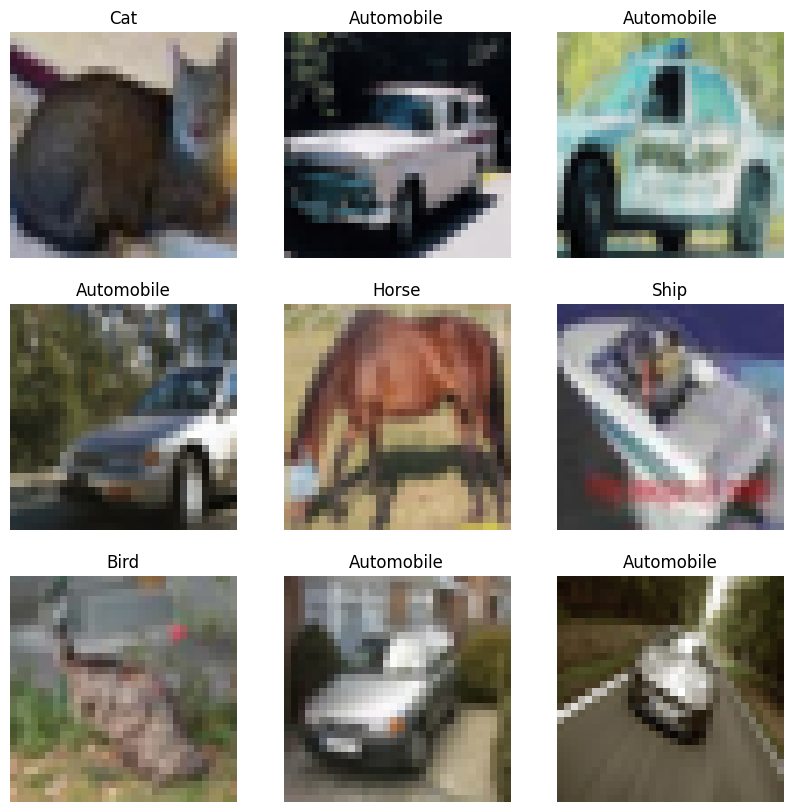

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Class names for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot 9 random images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    rand_index = np.random.randint(len(x_train))  # Pick a random image
    plt.imshow(x_train[rand_index])  # Show image
    plt.title(class_names[y_train[rand_index][0]])  # Show label
    plt.axis("off")  # Hide axis

plt.show()


In [3]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\pbpat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.3591 - loss: 1.7487 - val_accuracy: 0.5736 - val_loss: 1.2091
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5865 - loss: 1.1561 - val_accuracy: 0.6270 - val_loss: 1.0611
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6607 - loss: 0.9620 - val_accuracy: 0.6795 - val_loss: 0.9244
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7008 - loss: 0.8510 - val_accuracy: 0.6972 - val_loss: 0.8794
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7329 - loss: 0.7645 - val_accuracy: 0.7049 - val_loss: 0.8585
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7609 - loss: 0.6827 - val_accuracy: 0.7106 - val_loss: 0.8462
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.7821 - loss: 0.6274 - val_accuracy: 0.7236 - val_loss: 0.8224
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8005 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7142 - loss: 1.5743
Test Accuracy: 71.81%


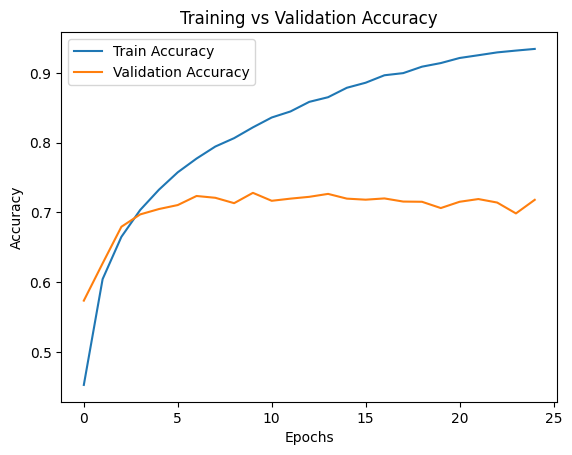

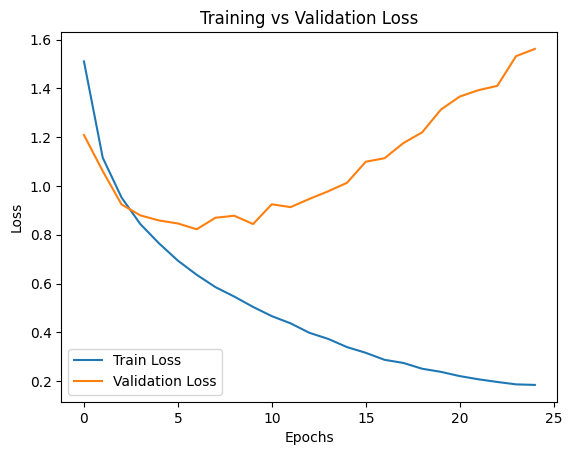

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [10]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


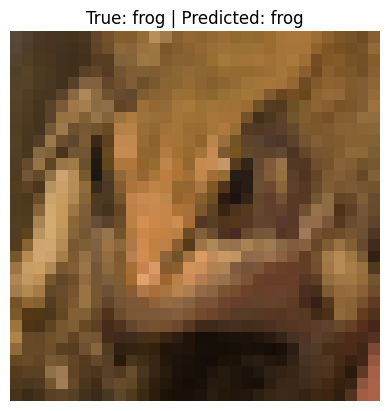

In [11]:
import numpy as np

# Pick a random image from test dataset
index = np.random.randint(len(x_test))
image = x_test[index]  # Get the image
true_label = class_names[y_test[index][0]]  # Get actual label

# Make a prediction
predictions = model.predict(np.expand_dims(image, axis=0))  # Add batch dimension
predicted_label = class_names[np.argmax(predictions)]  # Get highest probability class

# Show image with predicted vs actual label
plt.imshow(image)
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis("off")
plt.show()


In [13]:
model.save("cifar10_cnn_model.keras")  # Save in the new format
